In [4]:
! pip install pygbif

In [5]:
# Tratamiento de datos
# ------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8) 

# Bio geolocalización
# ------------------------------------------------------------------------
import pygbif 

# Preferencias
# ------------------------------------------------------------------------
pd.options.display.max_rows = None

In [6]:
df1 = pd.read_csv('archive/parks.csv')
df1.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [7]:
df1.isnull().sum()

Park Code    0
Park Name    0
State        0
Acres        0
Latitude     0
Longitude    0
dtype: int64

In [8]:
df1.shape

(56, 6)

In [9]:
df2 = pd.read_csv('archive/species.csv')
df2.head()

/tmp/ipykernel_1705/2082570300.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('archive/species.csv')


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [10]:
df2.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

In [11]:
df2.shape

(119248, 14)

In [12]:
df2.Category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Spider/Scorpion', 'Insect', 'Invertebrate', 'Fungi',
       'Nonvascular Plant', 'Crab/Lobster/Shrimp', 'Slug/Snail', 'Algae'],
      dtype=object)

In [13]:
cnidarios = df2[df2['Category']== 'Invertebrate']

In [14]:
cnidarios.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
3972,BADL-2215,Badlands National Park,Invertebrate,Stauromedusae,Lipkeidae,Capria,Feral Goats,In Review,Present,NaN,NaN,NaN,NaN,NaN
8107,BISC-2692,Biscayne National Park,Invertebrate,NaN,NaN,Madracis auretenra,Ten-Ray Star Coral,Approved,Present,Native,Rare,NaN,NaN,NaN
8108,BISC-2693,Biscayne National Park,Invertebrate,NaN,NaN,Pseudodiploria clivosa,Knobby Brain Coral,Approved,Present,Native,Occasional,NaN,NaN,NaN
8109,BISC-2694,Biscayne National Park,Invertebrate,NaN,NaN,Pseudodiploria strigosa,Symmetrical Brain Coral,Approved,Present,Native,Uncommon,NaN,NaN,NaN
8110,BISC-2695,Biscayne National Park,Invertebrate,NaN,NaN,Undaria agaricites,Lettuce Coral,Approved,Present,Native,Common,NaN,NaN,NaN


In [15]:
cnidarios.shape

(1566, 14)

In [16]:
df2.drop('Unnamed: 13', axis=1, inplace=True)

In [17]:
df2['Occurrence'].value_counts()

Present                            83278
Not Confirmed                      11958
Not Present (False Report)          2072
Not Present (Historical Report)     1310
Not Present                          431
Approved                              51
In Review                              6
Name: Occurrence, dtype: int64

In [18]:
df2['Nativeness'].value_counts()

Native           75950
Not Native       11095
Unknown           7101
Present             53
Not Confirmed        4
Name: Nativeness, dtype: int64

In [19]:
df2['Abundance'].value_counts()

Unknown       28119
Uncommon      18779
Common        12913
Rare          10768
Occasional     3312
Abundant       2365
Native           40
Not Native       10
Name: Abundance, dtype: int64

In [20]:
df2['Seasonality'].value_counts()

Breeder                                 12214
Resident                                 3215
Migratory                                2825
Vagrant                                  1660
Breeder, Winter                            64
Rare                                       35
Summer                                     26
Migratory, Winter                          24
Winter                                     20
Breeder, Resident                          20
Breeder, Migratory                         13
Resident, Winter                            9
Uncommon                                    5
Common                                      4
Migratory, Vagrant                          4
Summer, Vagrant                             3
Breeder, Resident, Summer                   3
Migratory, Summer                           3
Unknown                                     3
Resident, Summer                            2
Breeder, Summer                             2
Breeder, Resident, Migratory, Summ

In [21]:
df2['Conservation Status'].value_counts()

Species of Concern     3843
Endangered              374
Under Review            194
Threatened              184
In Recovery              77
Proposed Endangered      24
Proposed Threatened       7
Breeder                   7
Resident                  5
Migratory                 2
Extinct                   1
Name: Conservation Status, dtype: int64

In [23]:
df3 = df2.merge(df1, on='Park Name', how='left')

In [24]:
df3.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Park Code,State,Acres,Latitude,Longitude
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,ACAD,ME,47390,44.35,-68.21
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,ACAD,ME,47390,44.35,-68.21
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,ACAD,ME,47390,44.35,-68.21
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,ACAD,ME,47390,44.35,-68.21
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,ACAD,ME,47390,44.35,-68.21


In [25]:
df3.shape

(119248, 18)

In [31]:
df3['Acres'].value_counts().sort_values()

64701       848
93533       853
42984       952
1750717    1025
76519      1048
669983     1057
70447      1165
337598     1223
3674530    1225
52122      1243
35835      1286
3372402    1320
7523898    1353
242756     1389
28295      1395
571790     1397
26606      1416
218200     1453
46766      1536
241904     1566
47390      1709
172924     1726
235625     1743
86416      1746
146598     1796
8323148    1796
106372     1797
91440      1834
249561     1885
922651     1948
5550       1950
3224840    1957
865952     1995
2619733    2007
309995     2030
1508538    2084
761266     2088
801163     2269
789745     2294
26546      2321
52830      2499
1013572    2556
29094      2580
1217403    2622
77180      2653
32950      3047
265828     3152
323431     3298
504781     3363
183224     3760
2219791    3966
4740912    4439
199045     4655
112512     6310
521490     6623
Name: Acres, dtype: int64

In [36]:
df_parks= df3[df3['Acres']>200000]
df_parks.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Park Code,State,Acres,Latitude,Longitude
2757,BADL-1000,Badlands National Park,Mammal,Artiodactyla,Antilocapridae,Antilocapra americana,"Pronghorn, Pronghorn",Approved,Present,Native,Common,Breeder,NaN,BADL,SD,242756,43.75,-102.5
2758,BADL-1001,Badlands National Park,Mammal,Artiodactyla,Bovidae,Bison bison,"American Bison, American Bison, Bison",Approved,Present,Native,Common,Breeder,NaN,BADL,SD,242756,43.75,-102.5
2759,BADL-1002,Badlands National Park,Mammal,Artiodactyla,Bovidae,Ovis canadensis,Bighorn Sheep,Approved,Present,Native,Common,Breeder,Species of Concern,BADL,SD,242756,43.75,-102.5
2760,BADL-1003,Badlands National Park,Mammal,Artiodactyla,Cervidae,Cervus elaphus,"Elk, Red Deer (See Comments), Wapiti, Wapiti O...",Approved,Not Confirmed,Native,NaN,NaN,NaN,BADL,SD,242756,43.75,-102.5
2761,BADL-1004,Badlands National Park,Mammal,Artiodactyla,Cervidae,Odocoileus hemionus,Mule Deer,Approved,Present,Native,Common,Breeder,NaN,BADL,SD,242756,43.75,-102.5


In [37]:
df_parks['Park Name'].unique()

array(['Badlands National Park', 'Big Bend National Park',
       'Canyonlands National Park', 'Capitol Reef National Park',
       'Channel Islands National Park',
       'Denali National Park and Preserve', 'Death Valley National Park',
       'Everglades National Park',
       'Gates Of The Arctic National Park and Preserve',
       'Glacier National Park', 'Glacier Bay National Park and Preserve',
       'Grand Canyon National Park',
       'Great Smoky Mountains National Park', 'Grand Teton National Park',
       'Hawaii Volcanoes National Park', 'Isle Royale National Park',
       'Joshua Tree National Park', 'Katmai National Park and Preserve',
       'Kenai Fjords National Park', 'Kobuk Valley National Park',
       'Lake Clark National Park and Preserve',
       'Mount Rainier National Park', 'North Cascades National Park',
       'Olympic National Park', 'Rocky Mountain National Park',
       'Sequoia and Kings Canyon National Parks',
       'Voyageurs National Park',
       

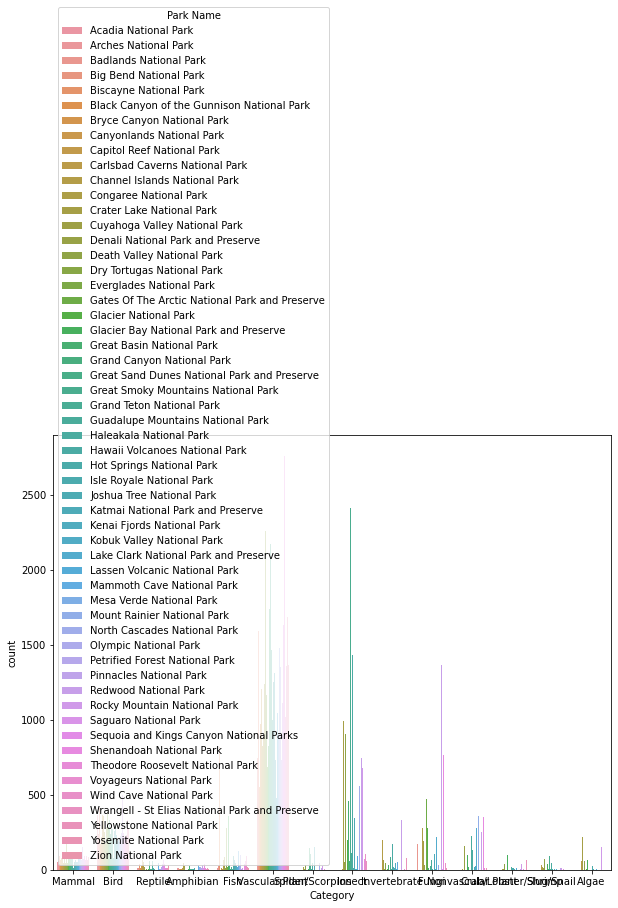

In [27]:
sns.countplot(x='Category', data =df3, hue='Park Name');